In [1]:
# -----------Clustering
# from sklearn.datasets import make_blobs # 임의의 점
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score # silhouette_samples는 차트 그리는 용

# -----------visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns

# -----------dataframe
import numpy as np
import pandas as pd

# -----------dataset
from sklearn.datasets import load_iris

# -----------scaler
from sklearn.preprocessing import StandardScaler

# load data

In [2]:
# 강사님(dataset=load_iris() 로 두고 짧게 표현)

In [3]:
load_iris().keys()
# dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
iris=pd.DataFrame(columns=load_iris()['feature_names'], data=load_iris()['data'])

In [5]:
iris['target']=load_iris()['target']

In [6]:
iris.columns = ['sl', 'sw', 'pl', 'pw','target']

In [7]:
iris.head()

,sl,sw,pl,pw,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sl      150 non-null    float64
 1   sw      150 non-null    float64
 2   pl      150 non-null    float64
 3   pw      150 non-null    float64
 4   target  150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [9]:
iris['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

# KMeans
class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')

max_iter : 몇 번 돌릴까
tol : 얼마나 성능 개선 안 되면 멈출까


## SL, SW -> 두 개 군집이 적당하다

In [10]:
model=KMeans(n_clusters=3, random_state=1024)
model.fit(iris[['sl', 'sw']])

 # cluster label
pred_label=model.predict(iris[['sl', 'sw']])
print(pred_label[:5])

# cluster headers
cheader=model.cluster_centers_
print(cheader)


[1 1 1 1 1]
[[6.81276596 3.07446809]
 [5.006      3.428     ]
 [5.77358491 2.69245283]]


In [11]:
cx=[]
cy=[]
for xy in cheader:
    cx.append(xy[0]) # sl
    cy.append(xy[1]) # sw


In [12]:
iris['label_s']=pred_label.reshape(-1,1)
iris.head()

,sl,sw,pl,pw,target,label_s
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [13]:
pd.crosstab(iris['target'], iris['label_s'])

label_s,0,1,2
target,,,
0,0,50,0
1,12,0,38
2,35,0,15


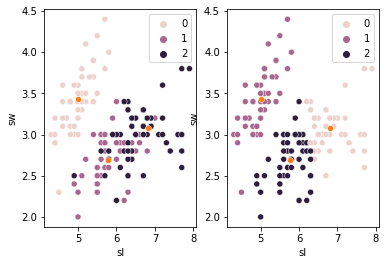

In [14]:
p, axes=plt.subplots(1,2)

sns.scatterplot(x=iris['sl'], y=iris['sw'], hue=iris['target'], ax=axes[0])
sns.scatterplot(x=cx, y=cy, ax=axes[0])

# sns.scatterplot(x=cheader[:][0], y=cheader[:][1], ax=axes[1])
sns.scatterplot(x=iris['sl'], y=iris['sw'], hue=iris['label_s'], ax=axes[1])
sns.scatterplot(x=cx, y=cy, ax=axes[1]) # 강사님은 데이터 프레임에 넣어서 했는데 안 넣고 이렇게 해도 된다.
plt.show()

# 혼합되어 있는 부분 틀리게 라벨링 했다.

## PL, PW -> 세 개 군집이 적당하다.

** 클러스터링은 한 번 하고 끝나는 게 아니라 뭘 기준으로 했을 때 몇 개 클러스터가 나오는지 다양한 기준에 따라 설명할 수 있다.

In [15]:
model=KMeans(n_clusters=3, random_state=1024)
model.fit(iris[['pl', 'pw']])
pred_label=model.predict(iris[['pl', 'pw']])
pred_label[:4]

iris['label_p']=pred_label.reshape(-1,1)

In [16]:
pd.crosstab(iris['target'], iris['label_p'])

label_p,0,1,2
target,,,
0,50,0,0
1,0,2,48
2,0,46,4


In [17]:
cheader=model.cluster_centers_
cx=[]
cy=[]

for xy in cheader:
    cx.append(xy[0])
    cy.append(xy[1])

<AxesSubplot:xlabel='pl', ylabel='pw'>

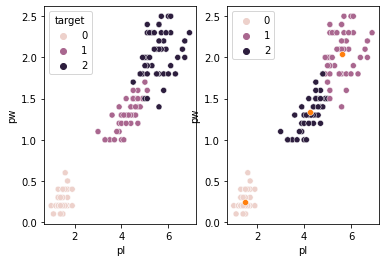

In [18]:
f, axes = plt.subplots(1,2)

sns.scatterplot(x='pl', y='pw', hue='target', data=iris, ax=axes[0])

sns.scatterplot(x='pl', y='pw', hue='label_p', data=iris, ax=axes[1])
sns.scatterplot(x=cx, y=cy, ax=axes[1])

## SL, SW scaling-> 정규분포화 한다면?(오히려 안 좋아)
-> 분포가 그대로임. 근데 왜 나빠질까?(강사님 추측 : 거리 기반이라 그런가?)

In [19]:
# help 써봐라

In [20]:
ss=StandardScaler() # .fit(X=)

In [21]:
ss.fit(iris[['sl', 'sw']])
iris[['sl_s', 'sw_s']]=ss.transform(X=iris[['sl', 'sw']])

In [22]:
model=KMeans(n_clusters=3, random_state=1024)
model.fit(iris[['sl_s', 'sw_s']])

 # cluster label
pred_label=model.predict(iris[['sl_s', 'sw_s']])
print(pred_label[:5])

# cluster headers
cheader=model.cluster_centers_
print(cheader)


[2 2 2 2 2]
[[ 1.10971635  0.09821729]
 [-0.10143926 -0.94652188]
 [-1.00206653  0.90625492]]


In [23]:
cx=[]
cy=[]
for xy in cheader:
    cx.append(xy[0]) # sl
    cy.append(xy[1]) # sw


In [24]:
iris['label_ss']=pred_label.reshape(-1,1)
iris.head()

,sl,sw,pl,pw,target,label_s,label_p,sl_s,sw_s,label_ss
0,5.1,3.5,1.4,0.2,0,1,0,-0.900681,1.019004,2
1,4.9,3.0,1.4,0.2,0,1,0,-1.143017,-0.131979,2
2,4.7,3.2,1.3,0.2,0,1,0,-1.385353,0.328414,2
3,4.6,3.1,1.5,0.2,0,1,0,-1.506521,0.098217,2
4,5.0,3.6,1.4,0.2,0,1,0,-1.021849,1.249201,2


In [25]:
pd.crosstab(iris['target'], iris['label_ss'])

label_ss,0,1,2
target,,,
0,0,1,49
1,15,35,0
2,34,16,0


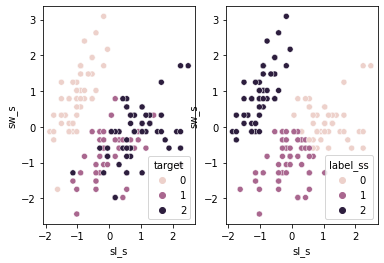

In [26]:
p, axes=plt.subplots(1,2)

sns.scatterplot(x=iris['sl_s'], y=iris['sw_s'], hue=iris['target'], ax=axes[0])
# sns.scatterplot(x=cx, y=cy, ax=axes[0])

# sns.scatterplot(x=cheader[:][0], y=cheader[:][1], ax=axes[1])
sns.scatterplot(x=iris['sl_s'], y=iris['sw_s'], hue=iris['label_ss'], ax=axes[1])
# sns.scatterplot(x=cx, y=cy, ax=axes[1]) # 강사님은 데이터 프레임에 넣어서 했는데 안 넣고 이렇게 해도 된다.
plt.show()

# 혼합되어 있는 부분 틀리게 라벨링 했다.

# 적정 K값 구하기(몇 개의 k가 적당할까?) -> loop
* inertia_ :   
Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

In [29]:
iris.head()

,sl,sw,pl,pw,target,label_s,label_p,sl_s,sw_s,label_ss
0,5.1,3.5,1.4,0.2,0,1,0,-0.900681,1.019004,2
1,4.9,3.0,1.4,0.2,0,1,0,-1.143017,-0.131979,2
2,4.7,3.2,1.3,0.2,0,1,0,-1.385353,0.328414,2
3,4.6,3.1,1.5,0.2,0,1,0,-1.506521,0.098217,2
4,5.0,3.6,1.4,0.2,0,1,0,-1.021849,1.249201,2


In [50]:
n_clusters_list=[2,3,4,5,6]
inertia_list=[]

for k in n_clusters_list:
    model=KMeans(n_clusters=k, random_state=1024)
    model.fit(iris[['pl', 'pw']])
    inertia_list.append(model.inertia_) # head와 다른 node들과의 거리


Text(0, 0.5, 'sum of squared distances')

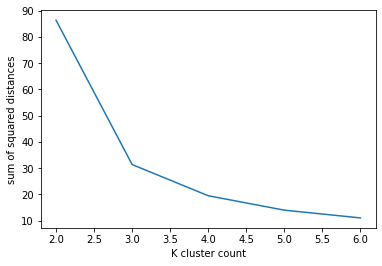

In [51]:
# 꺾이는 지점을 elbow라고 한다.
plt.plot([2,3,4,5,6], inertia_list)
plt.xlabel("K cluster count")
plt.ylabel("sum of squared distances") # 3에서 가장 많이 꺾인다.

## 왜 이런 현상을 보이나?

In [ ]:
# corr을 찍어보자 -> 다중공선 보이는 애들끼리 묶어서 해도 됨

In [ ]:
sns.heatmap(iris[['sl', 'sw', 'pl', 'pw', 'target']].corr(), fmt='.2f', cmap='Blues', annot=True)
plt.show()

## silhouette_samples
* compute the Silhouetted Coefficient for each sample.

In [ ]:
silhouette_samples()

In [33]:
scoef_=silhouette_samples(iris[['pl', 'pw']], labels=iris['label_p'], metric='euclidean') # target 같은 건 필요 없다.
print(scoef_[:5]) # header와 가까울수록 1에 가깝고 멀수록 수치 작아짐

[0.9439618  0.9439618  0.93011824 0.94214886 0.9439618 ]


In [35]:
iris['scoef']=scoef_.reshape(-1,1)
iris.head()

,sl,sw,pl,pw,target,label_s,label_p,sl_s,sw_s,label_ss,scoef
0,5.1,3.5,1.4,0.2,0,1,0,-0.900681,1.019004,2,0.943962
1,4.9,3.0,1.4,0.2,0,1,0,-1.143017,-0.131979,2,0.943962
2,4.7,3.2,1.3,0.2,0,1,0,-1.385353,0.328414,2,0.930118
3,4.6,3.1,1.5,0.2,0,1,0,-1.506521,0.098217,2,0.942149
4,5.0,3.6,1.4,0.2,0,1,0,-1.021849,1.249201,2,0.943962


In [39]:
sil_score=silhouette_score(iris[['pl', 'pw']], labels=iris['label_p'], metric='euclidean', random_state=1024)
print(sil_score)

0.6604800083974887


In [43]:
iris.groupby('label_p')['scoef'].mean().sort_values(ascending=False) # 0은 자기들끼리도 잘 묶여있다. 1,2랑은 떨어져있다.(???????)

label_p
0    0.918772
2    0.574097
1    0.485007
Name: scoef, dtype: float64

실루엣 스코어로 알 수 있는 것
* 이격 : 각 헤더가 얼마나 멀리 떨어져있나.(전체의 평균)
* 응집도 : 각 군집별로 해당 군집이 얼마나 점들이 가깝나

# method

In [46]:
# 차트 그릴 때 이거 가지고 쓸 것임

def view_chart(X, range_n_clusters=[2, 3, 4, 5, 6]):
    
    # X, y = make_blobs(
    #     n_samples=500,
    #     n_features=2,
    #     centers=4,
    #     cluster_std=1,
    #     center_box=(-10.0, 10.0),
    #     shuffle=True,
    #     random_state=1,
    # )  # For reproducibility

    # range_n_clusters = [2, 3, 4, 5, 6]

    for n_clusters in range_n_clusters:
        
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg,
        )

        # -------------------chart--------------------------------
        sample_silhouette_values = silhouette_samples(X, cluster_labels) # 차트 그릴 때 쓰이는 value

        y_lower = 10
        for i in range(n_clusters):
            
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7653904101258123
For n_clusters = 3 The average silhouette_score is : 0.6604800083974887
For n_clusters = 4 The average silhouette_score is : 0.6127580794464402
For n_clusters = 5 The average silhouette_score is : 0.5883732712110276
For n_clusters = 6 The average silhouette_score is : 0.5753448148375986


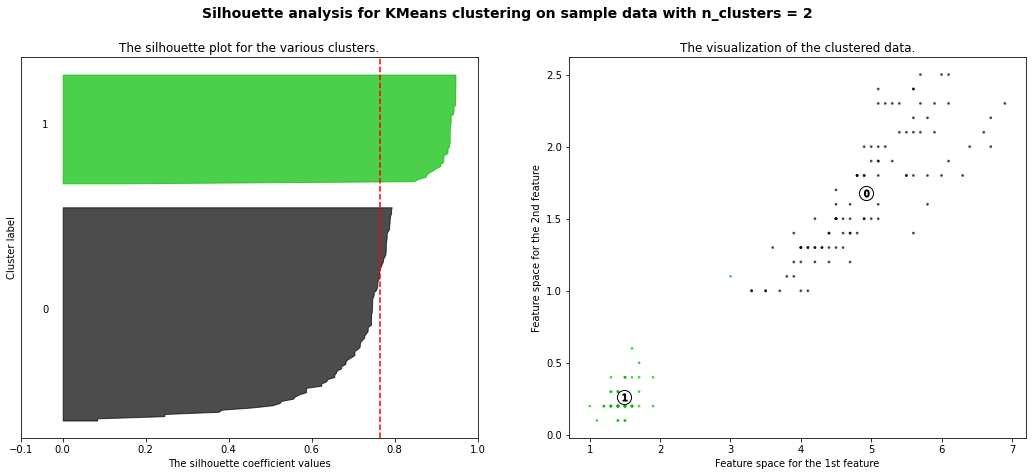

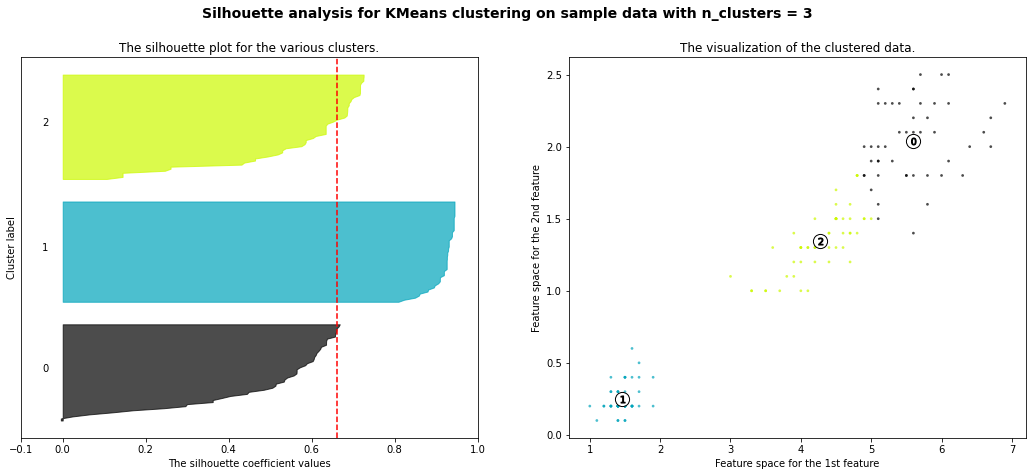

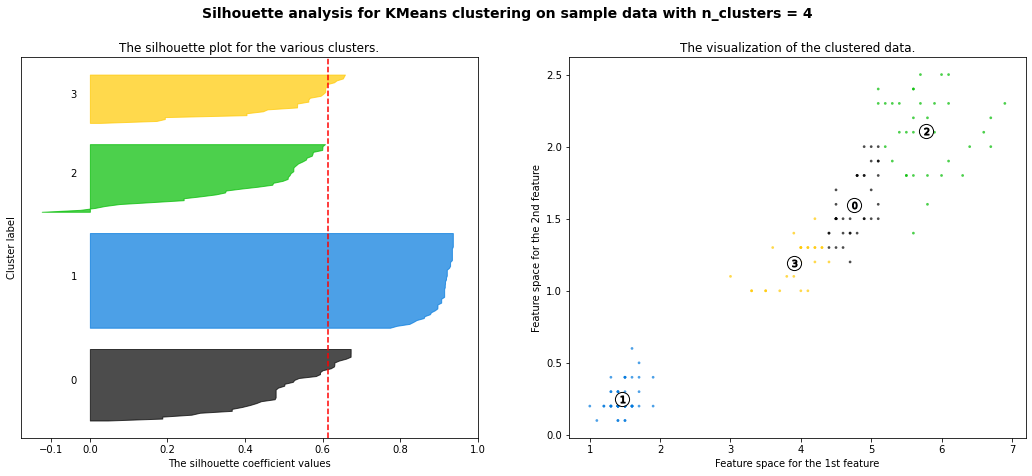

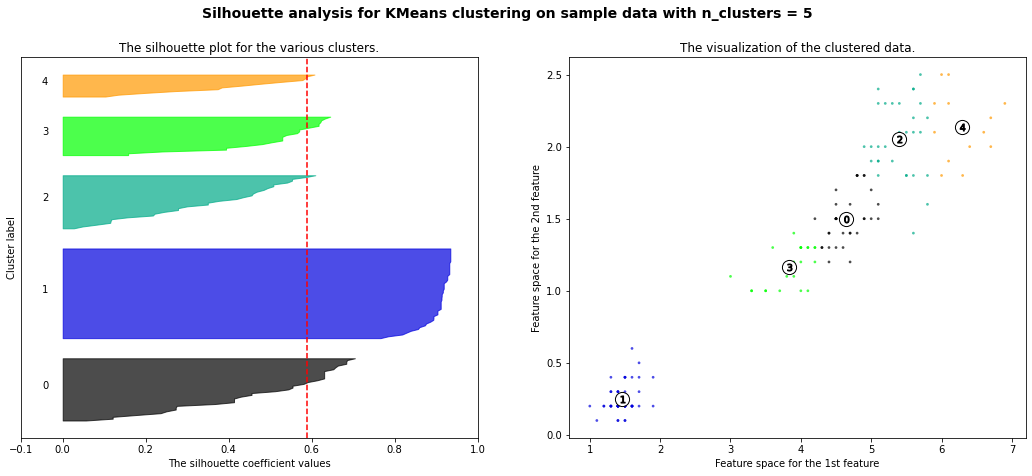

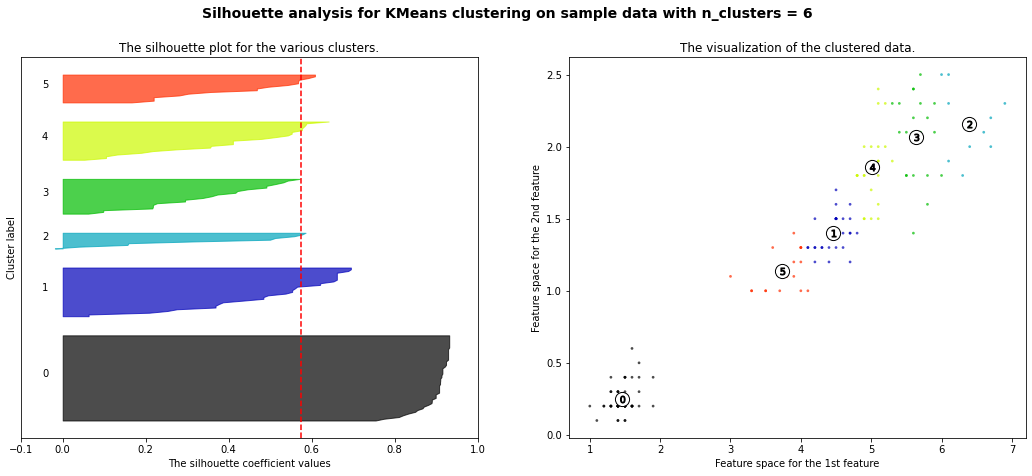

In [47]:
view_chart(iris[['pl', 'pw']])

In [ ]:
# 3D 그래프

C:\Users\LHL\AppData\Local\Temp/ipykernel_14776/2638415312.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


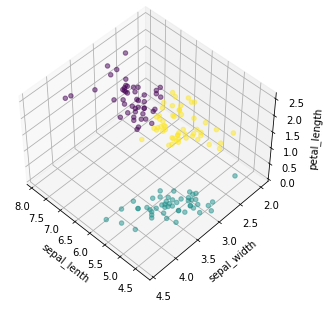

In [91]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure( figsize=(4,4))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(iris['sl'],iris['sw'],iris['pw'],c=iris['label_s'],alpha=0.5) # label은 다시 fit predict 해야됨
ax.set_xlabel('sepal_lenth')
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_length')
plt.show()

# DBSCAN: 밀도 기반
(Density-based spatial clustering of applications with noise)  
ref: https://bcho.tistory.com/1205 (조대협의 블로그)

In [52]:
# class sklearn.cluster.DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)

### 스케일링 한 것

In [74]:
# 최적 클러스터 잡고 싶으면 eps 와 min_samples for문으로 바꿔가며 조정하면 된다.
model=DBSCAN(eps=0.2, min_samples=5, metric='euclidean') 
pred_label=model.fit_predict(iris[['sl_s', 'sw_s']]) # DBSCAN은 predict 없다. -> model.fit 한 다음 model.labels 하면 된다.
print(pred_label[:5])
iris['label_dbscan']=pred_label.reshape(-1,1)
# iris['label_dbscan']=model.labels_.reshape(-1,1)


# cluster headers
# cheader=model.cluster_centers_ # 반경 내 누가 header다 이런 건 없다.
# cheader=model.core_sample_indices_  # 이것도 아니네
# print(cheader, cheader.shape)


[ 0 -1 -1 -1 -1]


In [83]:
pd.crosstab(iris['target'], iris['label_dbscan']) # -1은 안 묶인 애들

label_dbscan,-1,0,1,2
target,,,,
0,0,50,0,0
1,8,0,42,0
2,22,0,16,12


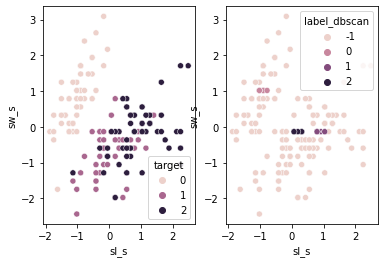

In [76]:
p, axes=plt.subplots(1,2)

sns.scatterplot(x=iris['sl_s'], y=iris['sw_s'], hue=iris['target'], ax=axes[0])
# sns.scatterplot(x=cx, y=cy, ax=axes[0])

# sns.scatterplot(x=cheader[:][0], y=cheader[:][1], ax=axes[1])
sns.scatterplot(x=iris['sl_s'], y=iris['sw_s'], hue=iris['label_dbscan'], ax=axes[1])
# sns.scatterplot(x=cx, y=cy, ax=axes[1]) # 강사님은 데이터 프레임에 넣어서 했는데 안 넣고 이렇게 해도 된다.
plt.show()

# 혼합되어 있는 부분 틀리게 라벨링 했다.

### scaling 안 하면

In [71]:
# 최적 클러스터 잡고 싶으면 eps 와 min_samples for문으로 바꿔가며 조정하면 된다.
model=DBSCAN(eps=0.2, min_samples=5, metric='euclidean') 
pred_label=model.fit_predict(iris[['sl', 'sw']]) # DBSCAN은 predict 없다. -> model.fit 한 다음 model.labels 하면 된다.
print(pred_label[:5])
iris['label_dbscan']=pred_label.reshape(-1,1)
# iris['label_dbscan']=model.labels_.reshape(-1,1)


# cluster headers
# cheader=model.cluster_centers_ # 반경 내 누가 header다 이런 건 없다.
# cheader=model.core_sample_indices_  # 이것도 아니네
# print(cheader, cheader.shape)


[0 0 0 0 0]


In [72]:
pd.crosstab(iris['target'], iris['label_dbscan'])

label_dbscan,-1,0,1,2
target,,,,
0,19,31,0,0
1,12,0,19,19
2,16,0,29,5


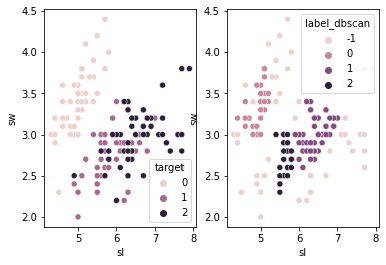

In [73]:
p, axes=plt.subplots(1,2)

sns.scatterplot(x=iris['sl'], y=iris['sw'], hue=iris['target'], ax=axes[0])
# sns.scatterplot(x=cx, y=cy, ax=axes[0])

# sns.scatterplot(x=cheader[:][0], y=cheader[:][1], ax=axes[1])
sns.scatterplot(x=iris['sl'], y=iris['sw'], hue=iris['label_dbscan'], ax=axes[1])
# sns.scatterplot(x=cx, y=cy, ax=axes[1]) # 강사님은 데이터 프레임에 넣어서 했는데 안 넣고 이렇게 해도 된다.
plt.show()

# 혼합되어 있는 부분 틀리게 라벨링 했다.

### PL,PW

In [84]:
# 최적 클러스터 잡고 싶으면 eps 와 min_samples for문으로 바꿔가며 조정하면 된다.
model=DBSCAN(eps=0.5, min_samples=5, metric='euclidean') 
pred_label=model.fit_predict(iris[['pl', 'pw']]) # DBSCAN은 predict 없다. -> model.fit 한 다음 model.labels 하면 된다.
print(pred_label[:5])
iris['label_dbscan']=pred_label.reshape(-1,1)
# iris['label_dbscan']=model.labels_.reshape(-1,1)


# cluster headers
# cheader=model.cluster_centers_ # 반경 내 누가 header다 이런 건 없다.
# cheader=model.core_sample_indices_  # 이것도 아니네
# print(cheader, cheader.shape)


[0 0 0 0 0]


In [85]:
pd.crosstab(iris['target'], iris['label_dbscan'])

label_dbscan,0,1
target,,
0,50,0
1,0,50
2,0,50


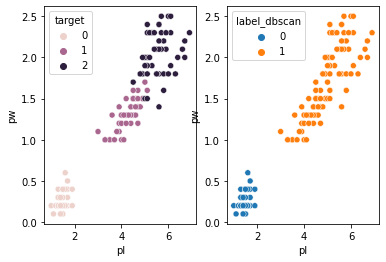

In [86]:
p, axes=plt.subplots(1,2)

sns.scatterplot(x=iris['pl'], y=iris['pw'], hue=iris['target'], ax=axes[0])
# sns.scatterplot(x=cx, y=cy, ax=axes[0])

# sns.scatterplot(x=cheader[:][0], y=cheader[:][1], ax=axes[1])
sns.scatterplot(x=iris['pl'], y=iris['pw'], hue=iris['label_dbscan'], ax=axes[1])
# sns.scatterplot(x=cx, y=cy, ax=axes[1]) # 강사님은 데이터 프레임에 넣어서 했는데 안 넣고 이렇게 해도 된다.
plt.show()

# 혼합되어 있는 부분 틀리게 라벨링 했다.

## for문 돌려보자

[0 0 0 0 0]


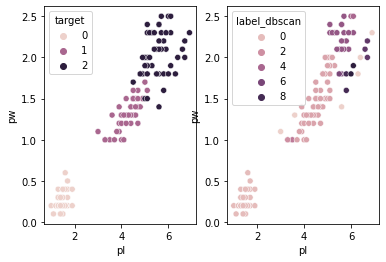

[0 0 0 0 0]


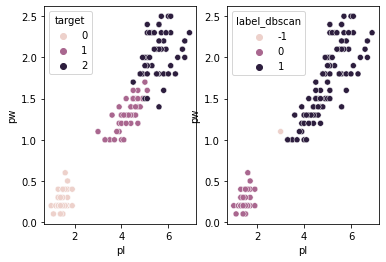

[0 0 0 0 0]


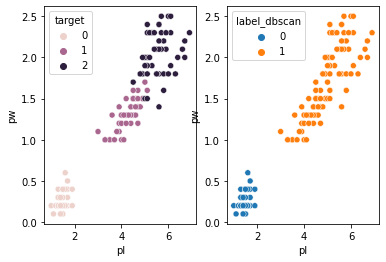

[0 0 0 0 0]


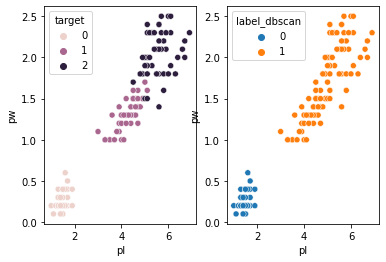

[0 0 0 0 0]


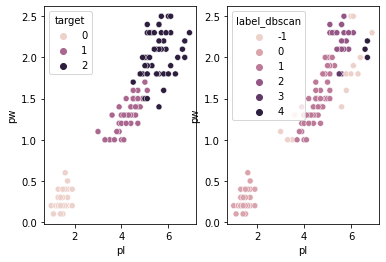

[0 0 0 0 0]


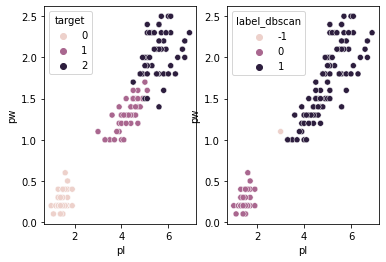

[0 0 0 0 0]


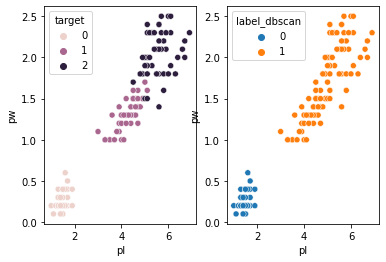

[0 0 0 0 0]


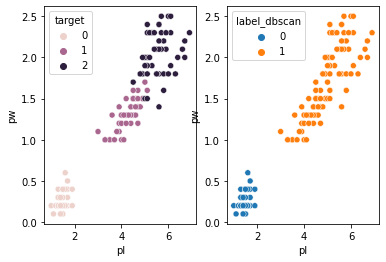

[0 0 0 0 0]


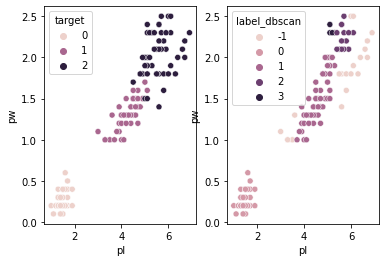

[0 0 0 0 0]


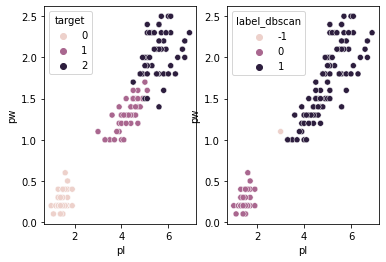

[0 0 0 0 0]


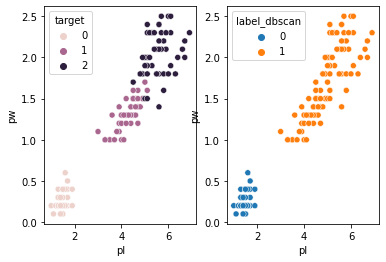

[0 0 0 0 0]


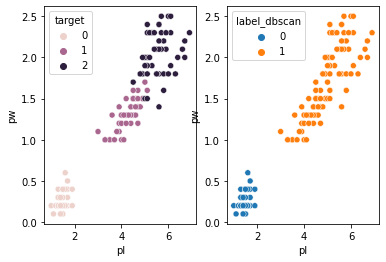

[0 0 0 0 0]


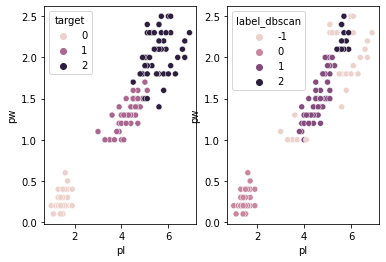

[0 0 0 0 0]


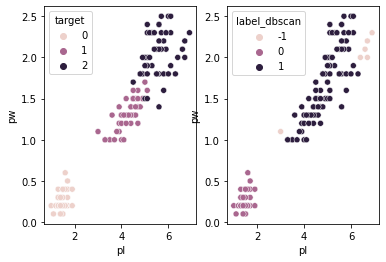

[0 0 0 0 0]


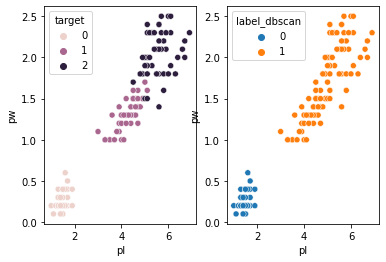

[0 0 0 0 0]


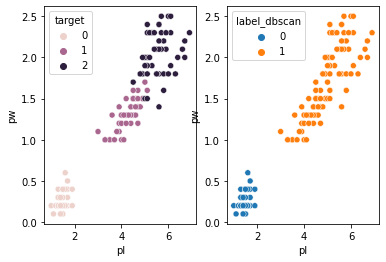

In [87]:

min_samples_list=[2,3,4,5]
eps_list=[0.2,0.3,0.4,0.5]

for ms in min_samples_list:
    for eps in eps_list:
        model=DBSCAN(eps=eps, min_samples=ms, metric='euclidean') 
        pred_label=model.fit_predict(iris[['pl', 'pw']]) # DBSCAN은 predict 없다. -> model.fit 한 다음 model.labels 하면 된다.
        print(pred_label[:5])
        iris['label_dbscan']=pred_label.reshape(-1,1)

        p, axes=plt.subplots(1,2)

        sns.scatterplot(x=iris['pl'], y=iris['pw'], hue=iris['target'], ax=axes[0])
        sns.scatterplot(x=iris['pl'], y=iris['pw'], hue=iris['label_dbscan'], ax=axes[1])
        plt.show()

# Hierachy : 계층형
계층적 형태는 데이터 많으면 좀 비효율적(너무 많은 cluster 만든다) -> 현업에서 많이는 안 씀
* ref: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
* ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

## 방법 1 ) sklearn.AgglomerativeClustering

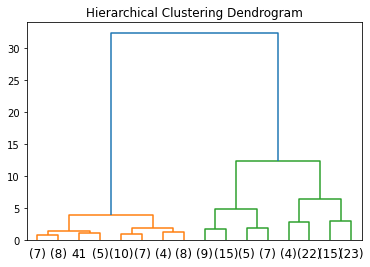

In [96]:
from scipy.cluster.hierarchy import dendrogram # scipy것
from sklearn.cluster import AgglomerativeClustering # 계층 모델 지원하는 킬러스터링


def my_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(iris[['sl','sw','pl','pw']])

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
my_dendrogram(model, truncate_mode="level", p=3)
# plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# 맨 밑에 있는 숫자는 leaf의 개수를 의미 -> 노션

## 방법 2) scipy.cluster.hierarchy.linkage

<pre>
from scipy.cluster.hierarchy import linkage # scipy도 또다른 통계모듈
# scipy.cluster.hierarchy.linkage(y, method='single', metric='euclidean', optimal_ordering=False)

# method : 'single': 단일 기준(가장 가까운 점), 'complete': 완전 기준(가장 먼 점), 'average'(평균 기준) (거리계산법)

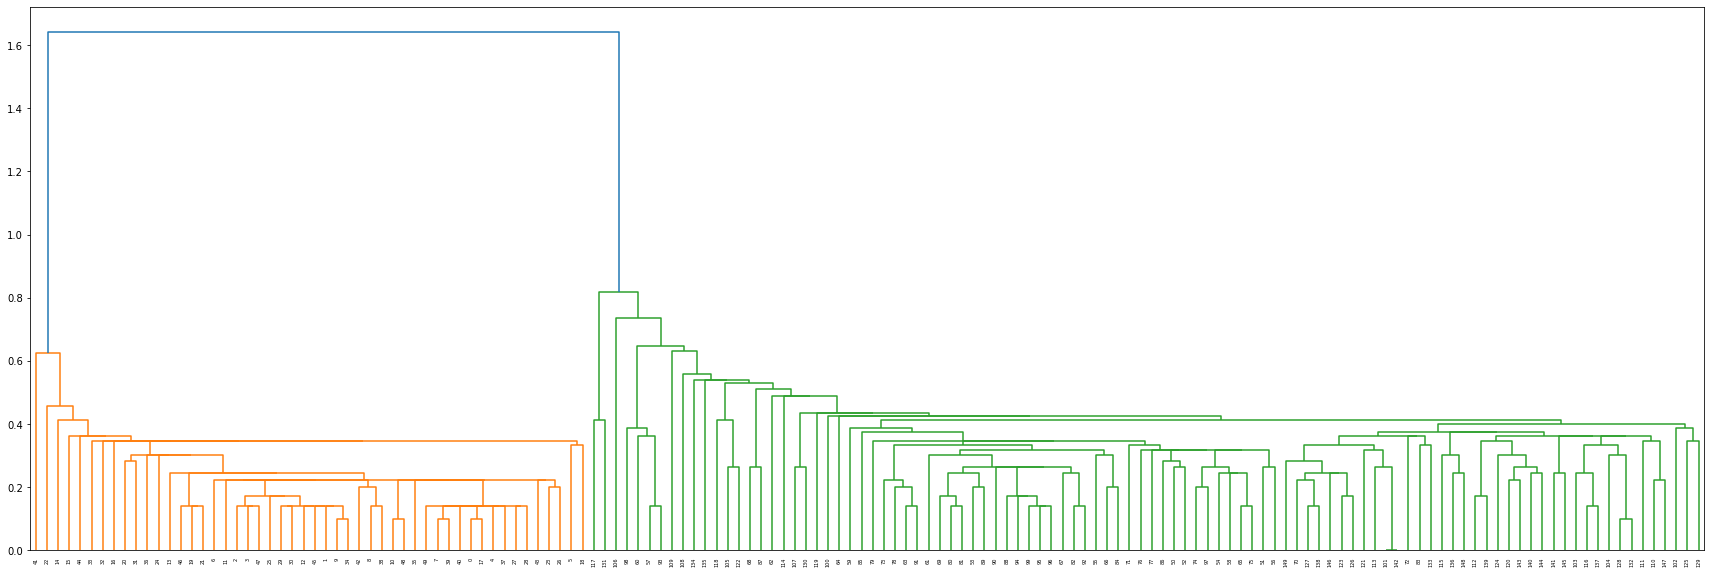

In [109]:
from scipy.cluster.hierarchy import dendrogram

arr=linkage(iris[['sl','sw','pl','pw']],
        method='single', # complete, average
       metric='euclidean')

plt.figure(figsize=(30,10))
plt.xticks(rotation=90)

dendrogram(arr)
plt.show()

# PCA() : 주성분 분석
- ~공분산 행렬 값 내적해서 선형 내적 구하고 선형 벡터의 치환해서 그걸 다시 내적해서 나온 값들을 아이겐벨류값으로 사용하고 해당 벨류가 나타낸 벡터를 아이겐벡터로한다~ 자세한 건 책 찾아봐
- 공분산 행렬 내적 - 고유값, 고유벡터 얻어낸다

- 고유벡터: == 고유값의 분산이 최대가 되는 벡터 선(PC1) + PC1과 직교가 되는(상관도가 전혀 없는) 벡터(PC2) + ... (그래서 최대 차원 수만큼(X변수 수만큼)만 PC가 만들어지는구나)  
  ==> explained ratio(원하는 설명력)를 얻을 때까지 반복
- 고유 값들의 모음을 주성분이라고 한다.

In [130]:
from sklearn.decomposition import PCA
print(iris.iloc[:5][['sl','sw','pl','pw']])
pca = PCA(n_components=None, random_state=1024) # n_components : 축소된 차원 차수  / None으로 할 때랑 4로 둘 때랑 다르다.(sum이 1이랑 0.999999로 다르다.)
pca_res=pca.fit_transform(iris[['sl','sw','pl','pw']])
print(pca_res[:5])

print(pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum()) # n_components 개수만큼 빼준다.

    sl   sw   pl   pw
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
[[-2.68412563e+00  3.19397247e-01 -2.79148276e-02 -2.26243707e-03]
 [-2.71414169e+00 -1.77001225e-01 -2.10464272e-01 -9.90265503e-02]
 [-2.88899057e+00 -1.44949426e-01  1.79002563e-02 -1.99683897e-02]
 [-2.74534286e+00 -3.18298979e-01  3.15593736e-02  7.55758166e-02]
 [-2.72871654e+00  3.26754513e-01  9.00792406e-02  6.12585926e-02]]
[0.92461872 0.05306648 0.01710261 0.00521218] 1.0


In [133]:
pca.components_ # 이건 그냥 내가 혼자...

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [134]:
from sklearn.decomposition import PCA
print(iris.iloc[:5][['sl','sw','pl','pw']])
pca = PCA(n_components=2, random_state=1024) # n_components : 축소된 차원 차수 
pca_res=pca.fit_transform(iris[['sl','sw','pl','pw']])
print(pca_res[:5])

print(pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum()) # n_components 개수만큼 빼준다.

    sl   sw   pl   pw
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]
[0.92461872 0.05306648] 0.977685206318795


In [136]:
pca.components_ # 이건 그냥 내가 혼자...

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [140]:
iris['sl']*0.36138659+iris['sw']*(-0.08452251)+iris['pl']*(0.85667061)+iris['pw']*(0.3582892)

0      2.818240
1      2.788223
2      2.613375
3      2.757022
4      2.773649
         ...   
145    7.446475
146    7.029532
147    7.266711
148    7.403307
149    6.892554
Length: 150, dtype: float64

<AxesSubplot:>

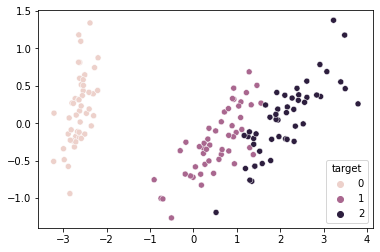

In [139]:
sns.scatterplot(x=pca_res[:,0], y=pca_res[:,1], hue=iris['target']) # 복잡한 클러스터링 안 했는데도 클러스터링 잘 됐다.

In [137]:
# pca_res를 데이터프레임에 넣어서 해도 된다 => 강사님 코드 참고